In [17]:
import pandas as pd
from matplotlib import pyplot as plt

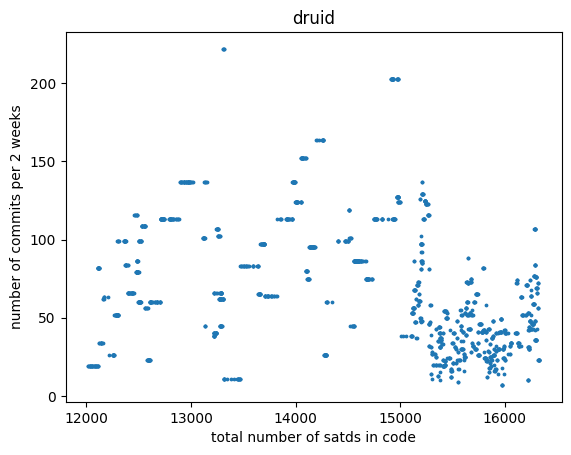

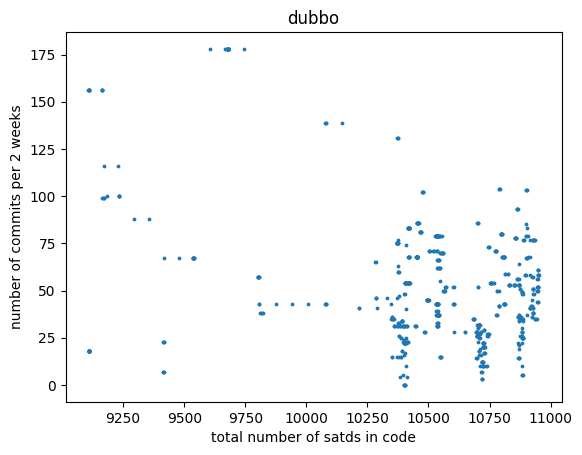

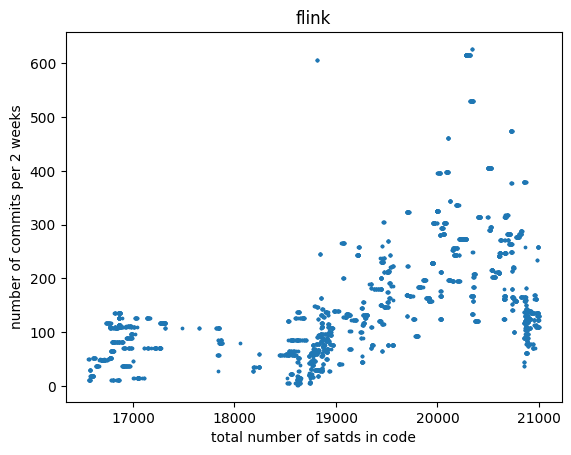

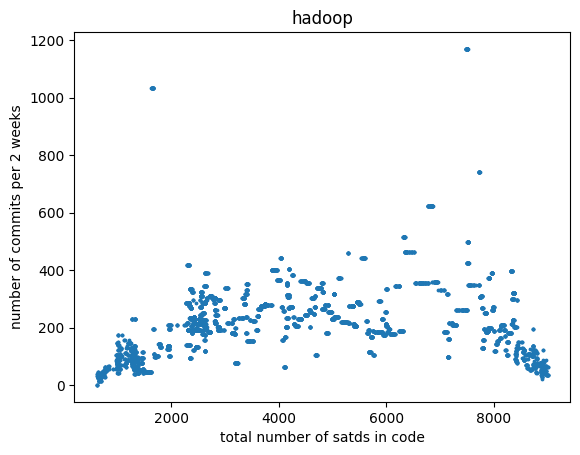

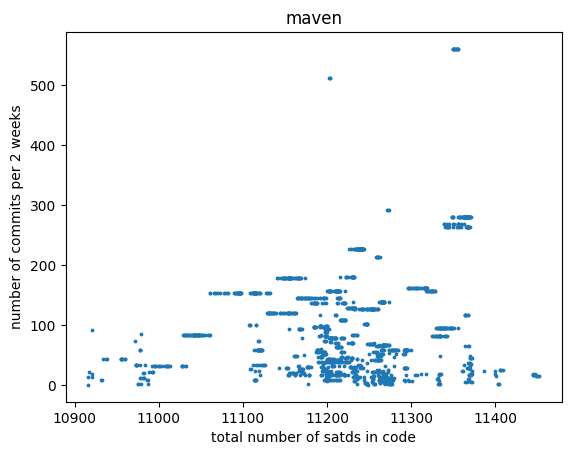

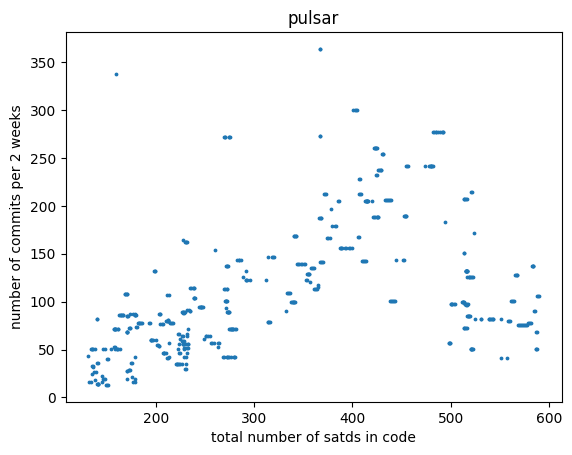

In [50]:

satds = pd.read_csv("data/satds.csv")
satds["total"] = satds["code|design-debt"] + satds["test-debt"] + satds["documentation-debt"] + satds["requirement-debt"]
satds["total_cumsum"] = satds["total"].cumsum()
commit_frequency = pd.read_csv("data/commit_frequency_2W.csv")

satds["timestamp"] = pd.to_datetime(satds["timestamp"], unit="s")
commit_frequency["timestamp"] = pd.to_datetime(commit_frequency["timestamp"])

for project in sorted(satds["project"].unique()):
    selection_satds = satds[satds["project"] == project].sort_values("timestamp")
    selection_commit_frequency = commit_frequency[commit_frequency["project"] == project].sort_values("timestamp")
    
    merged = pd.merge_asof(selection_satds, selection_commit_frequency, on="timestamp")
    
    plt.scatter(merged["total_cumsum"], merged["commits_per_2weeks"], s=3)
    plt.xlabel("total number of satds in code")
    plt.ylabel("number of commits per 2 weeks")
    plt.title(project)
    plt.show()

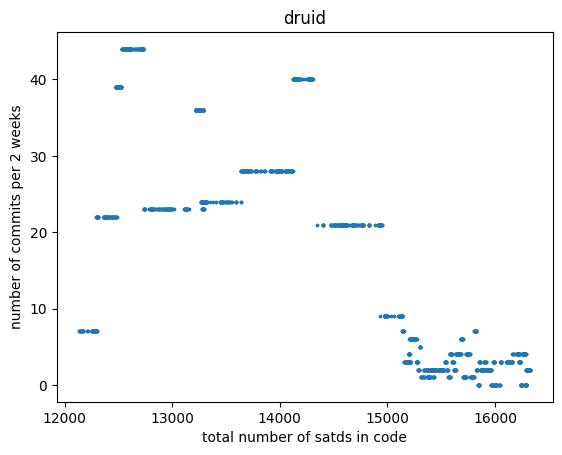

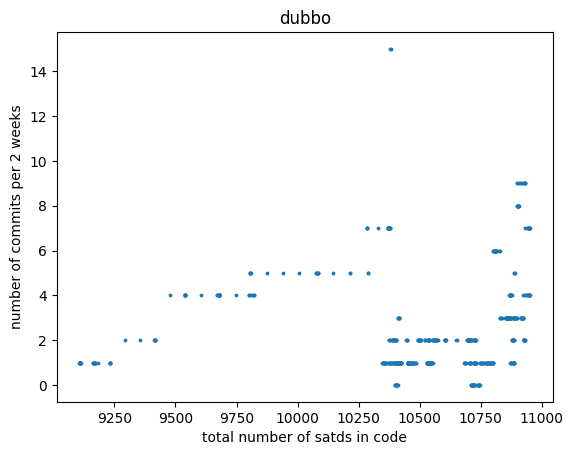

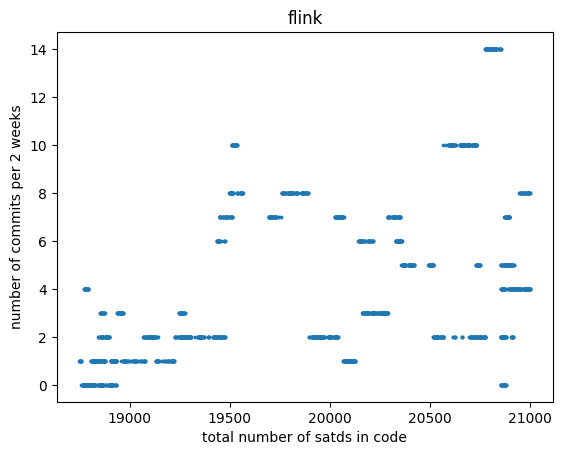

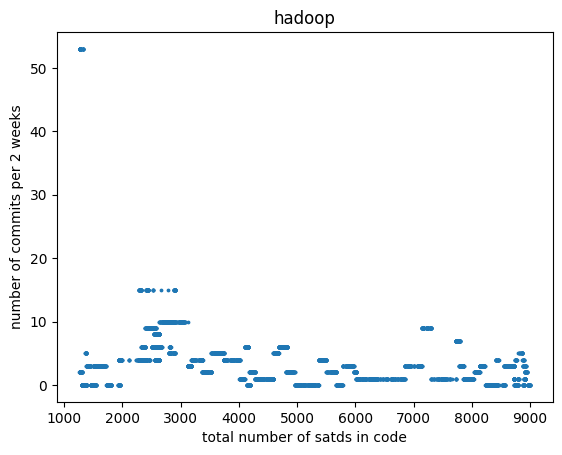

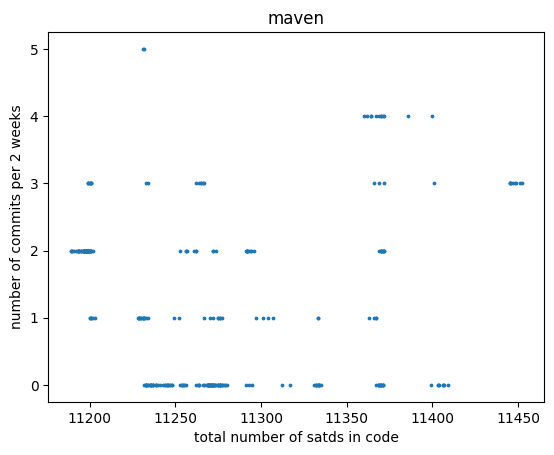

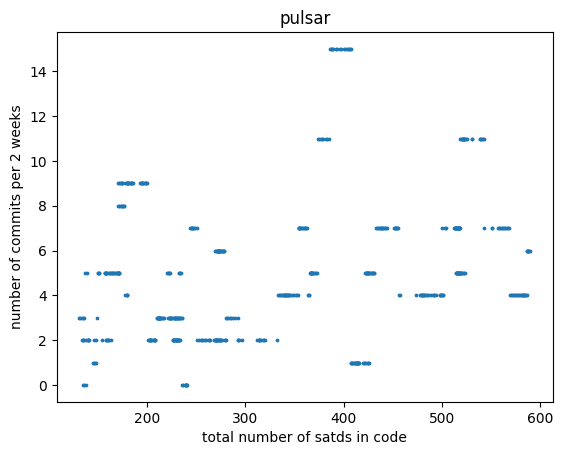

In [52]:
satds = pd.read_csv("data/satds.csv")
satds["total"] = satds["code|design-debt"] + satds["test-debt"] + satds["documentation-debt"] + satds["requirement-debt"]
satds["total_cumsum"] = satds["total"].cumsum()
commit_frequency = pd.read_csv("data/release_frequency_3M.csv")

satds["timestamp"] = pd.to_datetime(satds["timestamp"], unit="s")
commit_frequency["timestamp"] = pd.to_datetime(commit_frequency["timestamp"])

for project in sorted(satds["project"].unique()):
    selection_satds = satds[satds["project"] == project].sort_values("timestamp")
    selection_commit_frequency = commit_frequency[commit_frequency["project"] == project].sort_values("timestamp")
    
    merged = pd.merge_asof(selection_satds, selection_commit_frequency, on="timestamp")
    
    plt.scatter(merged["total_cumsum"], merged["releases_per_3months"], s=3)
    plt.xlabel("total number of satds in code")
    plt.ylabel("number of commits per 2 weeks")
    plt.title(project)
    plt.show()